# **BLINKIT SALES ANALYSIS**

### **IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **IMPORTING RAW DATA**

In [3]:
df = pd.read_csv("C:/Users/aleej/OneDrive/Documents/data analytics/Blinkit Analysis using python/blinkit_data.csv")
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [4]:
df.shape

(8523, 12)

In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [6]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **DATA CLEANING**

In [7]:
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [8]:
df["Item Fat Content"] = df["Item Fat Content"].replace({ "LF" : "Low Fat",
                                                        "low fat" : "Low Fat",
                                                        "reg" : "Regular"})
                                                        
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat']


In [9]:
print(df["Outlet Size"].unique())

['Medium' 'Small' 'High']


In [10]:
df["Outlet Size"] = df["Outlet Size"].replace({"High" : "Large"})
print(df["Outlet Size"].unique())

['Medium' 'Small' 'Large']


### **KPI REQIREMENTS**

In [11]:
#Total Sales
Total_sales = df["Sales"].sum()
print (f"Total Sales = ${Total_sales:,.1f}")

Total Sales = $1,201,681.5


In [12]:
#Average Sales
Avg_sales = df["Sales"].mean()
print (f"Average Sales = ${Avg_sales:,.1f}")

Average Sales = $141.0


In [13]:
#Average Sales
Avg_sales = df["Sales"].mean()
print (f"Average Sales = ${Avg_sales:,.1f}")

Average Sales = $141.0


In [14]:
#Average Ratings
Avg_Ratings = df["Rating"].mean()
print (f"Average Rating = {Avg_Ratings:,.1f}")

Average Rating = 4.0


### **CHART REQIREMENTS**

#### **Total Sales by Fat Content**

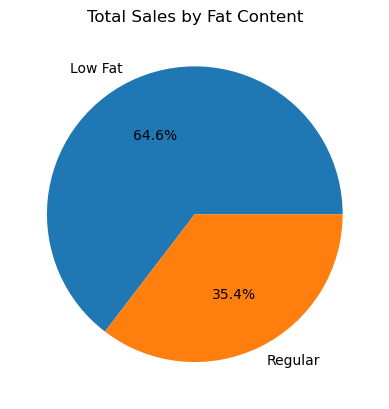

In [15]:
Sales_by_fat = df.groupby("Item Fat Content")["Sales"].sum()
plt.pie(Sales_by_fat, labels = Sales_by_fat.index, autopct = "%.1f%%")
plt.title("Total Sales by Fat Content")
plt.show()

#### **Average Sales by Fat Content**

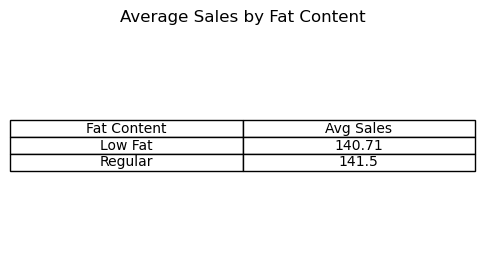

In [16]:


Avg_Sales_by_fat = df.groupby("Item Fat Content")["Sales"].mean()

table_df = pd.DataFrame({
    "Fat Content": Avg_Sales_by_fat.index,
    "Avg Sales": Avg_Sales_by_fat.values
})

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')

table = ax.table(
    cellText=table_df.round(2).values,
    colLabels=table_df.columns,
    cellLoc="center",
    loc="center"
)
plt.title("Average Sales by Fat Content")

plt.show()


#### **No. of Items by Fat Content**

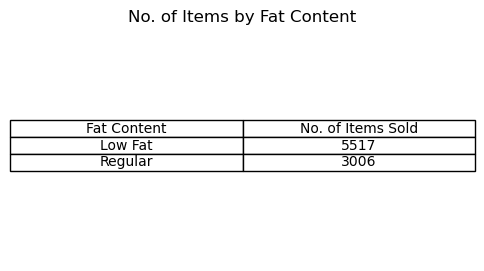

In [17]:
No_of_items_by_fat = df.groupby("Item Fat Content")["Sales"].count()
table_df = pd.DataFrame({
    "Fat Content": No_of_items_by_fat.index,
    "No. of Items Sold":No_of_items_by_fat.values
})

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')

table = ax.table(
    cellText=table_df.round(2).values,
    colLabels=table_df.columns,
    cellLoc="center",
    loc="center"
)
plt.title("No. of Items by Fat Content")
plt.show()

#### **Average of Rating by Fat Content**

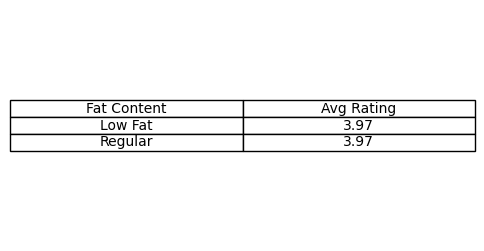

In [18]:
Avg_rating_by_fat = df.groupby("Item Fat Content")["Rating"].mean()
table_df = pd.DataFrame({
    "Fat Content": Avg_rating_by_fat.index,
    "Avg Rating":Avg_rating_by_fat.values
})

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')

table = ax.table(
    cellText=table_df.round(2).values,
    colLabels=table_df.columns,
    cellLoc="center",
    loc="center"
)
plt.show()

#### **Total Sales by Item type**

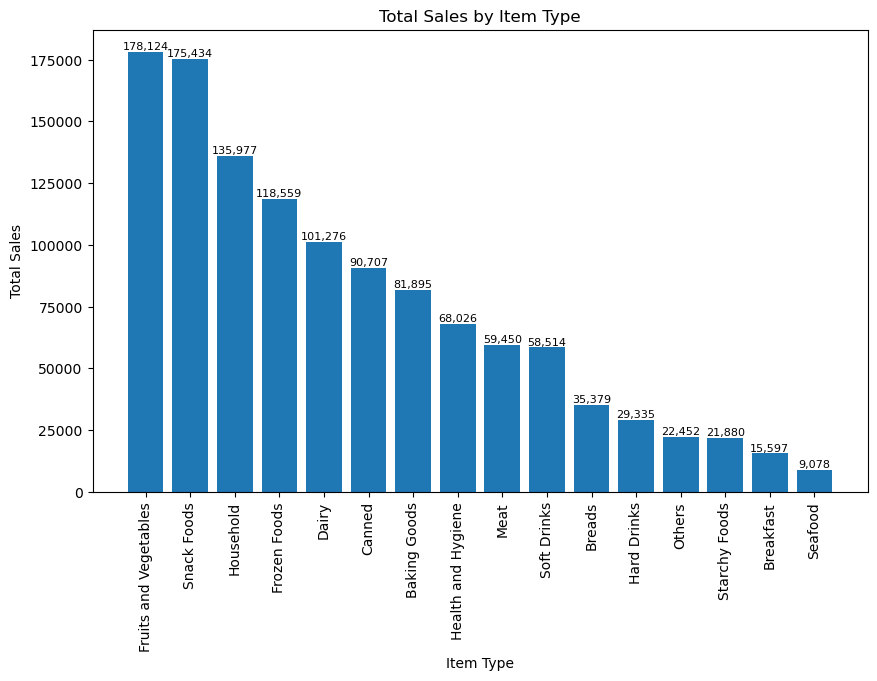

In [22]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)
plt.figure(figsize=(10 , 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation = 90)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Item Type")

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', ha="center", va="bottom", fontsize = 8)

plt.tight_layout
plt.show()


#### **Average Sales by Item type**

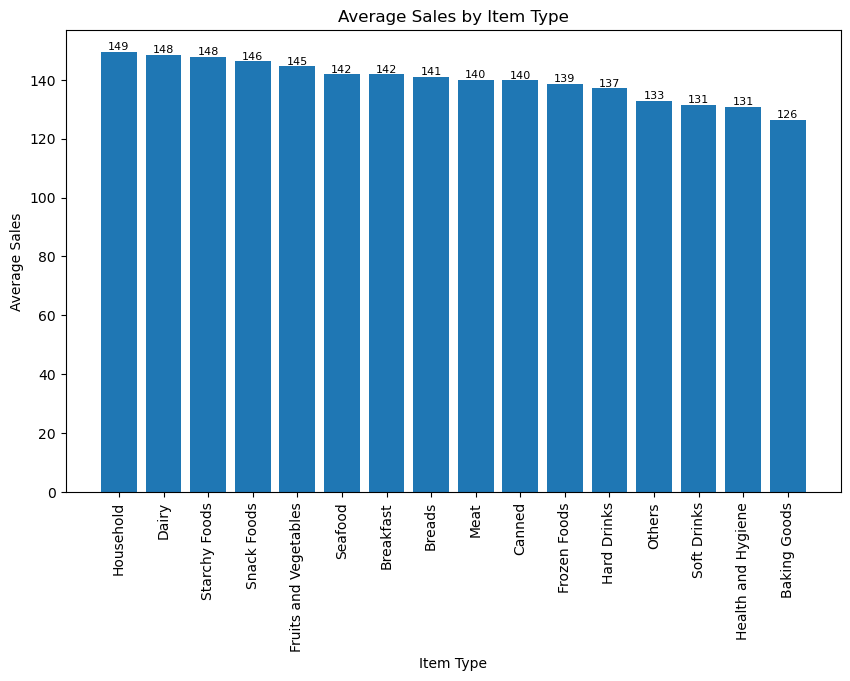

In [23]:
Avg_sales_by_type = df.groupby('Item Type')['Sales'].mean().sort_values(ascending = False)
plt.figure(figsize=(10 , 6))
bars = plt.bar(Avg_sales_by_type.index, Avg_sales_by_type.values)
plt.xticks(rotation = 90)
plt.xlabel("Item Type")
plt.ylabel("Average Sales")
plt.title("Average Sales by Item Type")

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', ha="center", va="bottom", fontsize = 8)

plt.tight_layout
plt.show()

#### **No.of Items by Item type**

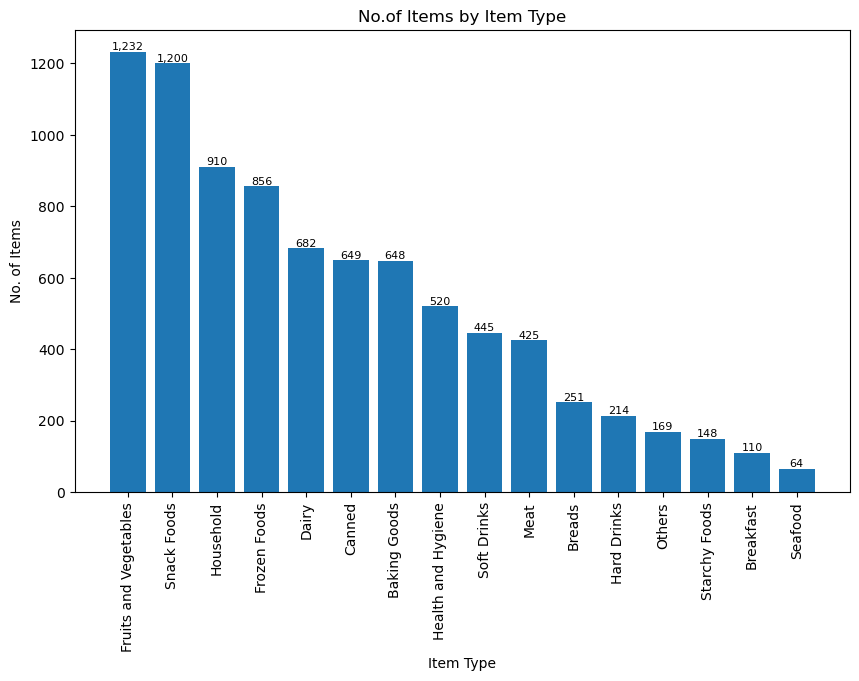

In [24]:
No_of_items_by_type = df.groupby('Item Type')['Sales'].count().sort_values(ascending = False)
plt.figure(figsize=(10 , 6))
bars = plt.bar(No_of_items_by_type.index, No_of_items_by_type.values)
plt.xticks(rotation = 90)
plt.xlabel("Item Type")
plt.ylabel("No. of Items")
plt.title("No.of Items by Item Type")

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', ha="center", va="bottom", fontsize = 8)

plt.tight_layout
plt.show()

#### **Average of Ratings by Item type**

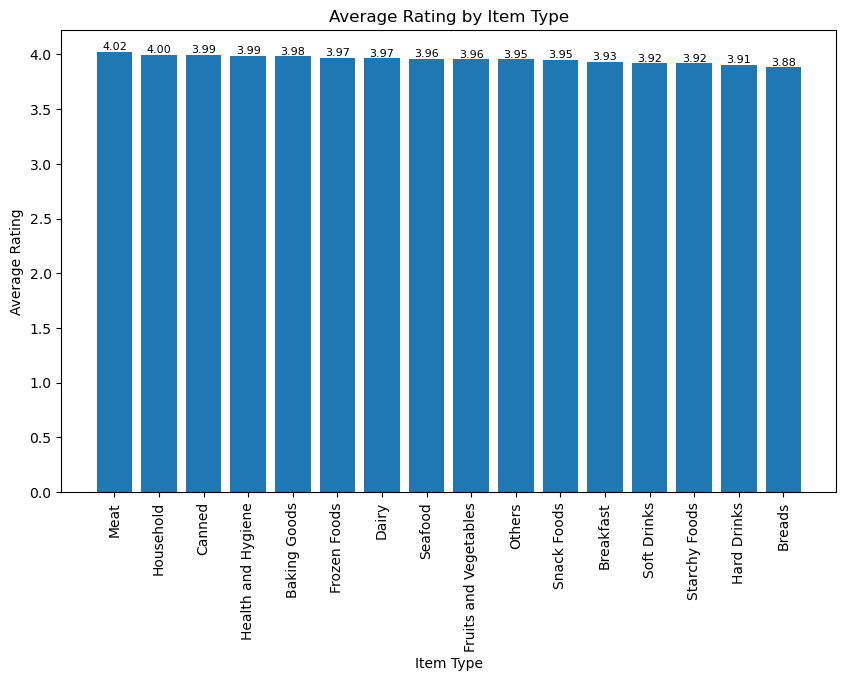

In [66]:
Avg_Rating_by_type = df.groupby('Item Type')['Rating'].mean().sort_values(ascending = False)
plt.figure(figsize=(10 , 6))
bars = plt.bar(Avg_Rating_by_type.index, Avg_Rating_by_type.values)
plt.xticks(rotation = 90)
plt.xlabel("Item Type")
plt.ylabel("Average Rating")
plt.title("Average Rating by Item Type")

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.2f}', ha="center", va="bottom", fontsize = 8)

plt.tight_layout
plt.show()

#### **Fat Content by Outlet for Total Sales**

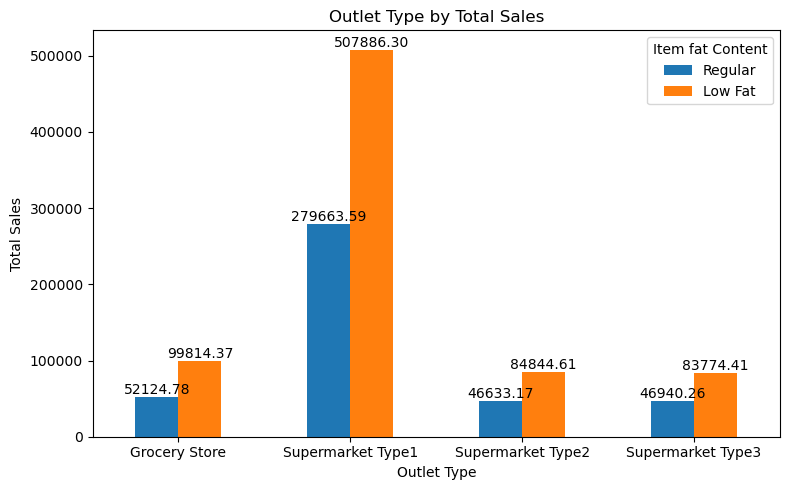

In [46]:
grouped = df.groupby(["Outlet Type" , "Item Fat Content"])["Sales"].sum().unstack()
grouped = grouped[["Regular","Low Fat"]]
ax = grouped.plot(kind="bar", figsize = (8,5), title = "Outlet Type by Total Sales")
plt.xlabel("Outlet Type")
plt.ylabel("Total Sales")
plt.legend(title = "Item fat Content")
plt.xticks(rotation = 0)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")
plt.tight_layout()
plt.show()

#### **Fat Content by Outlet for Average Sales**

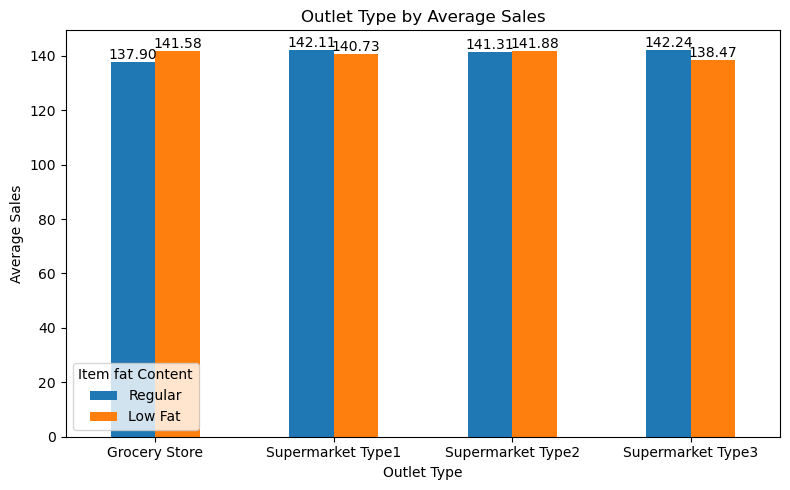

In [45]:
Avg_grouped = df.groupby(["Outlet Type" , "Item Fat Content"])["Sales"].mean().unstack()
Avg_grouped = Avg_grouped[["Regular","Low Fat"]]
ax = Avg_grouped.plot(kind="bar", figsize = (8,5), title = "Outlet Type by Average Sales")
plt.xlabel("Outlet Type")
plt.ylabel("Average Sales")
plt.legend(title = "Item fat Content")
plt.xticks(rotation = 0)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")
plt.tight_layout()
plt.show()

#### **Fat Content by Outlet for No. of Items**

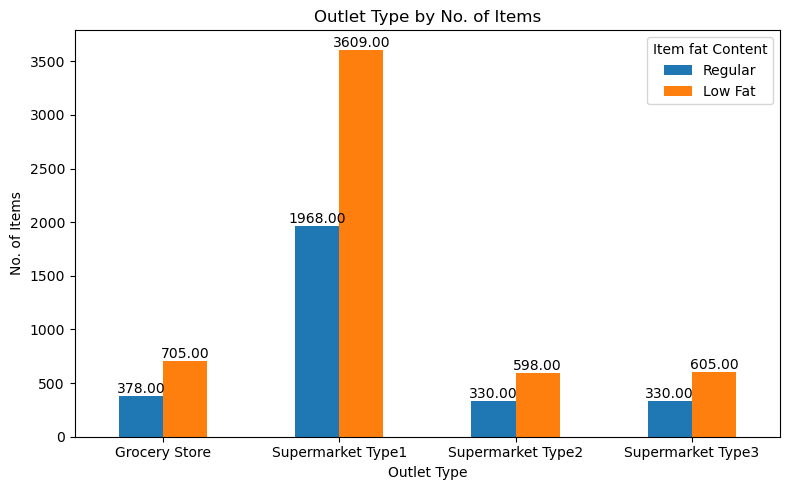

In [44]:
No_of_items_grouped = df.groupby(["Outlet Type" , "Item Fat Content"])["Sales"].count().unstack()
No_of_items_grouped = No_of_items_grouped[["Regular","Low Fat"]]
ax = No_of_items_grouped.plot(kind="bar", figsize = (8,5), title = "Outlet Type by No. of Items")
plt.xlabel("Outlet Type")
plt.ylabel("No. of Items")
plt.legend(title = "Item fat Content")
plt.xticks(rotation = 0)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")
plt.tight_layout()
plt.show()

#### **Fat Content by Outlet for Average Rating**

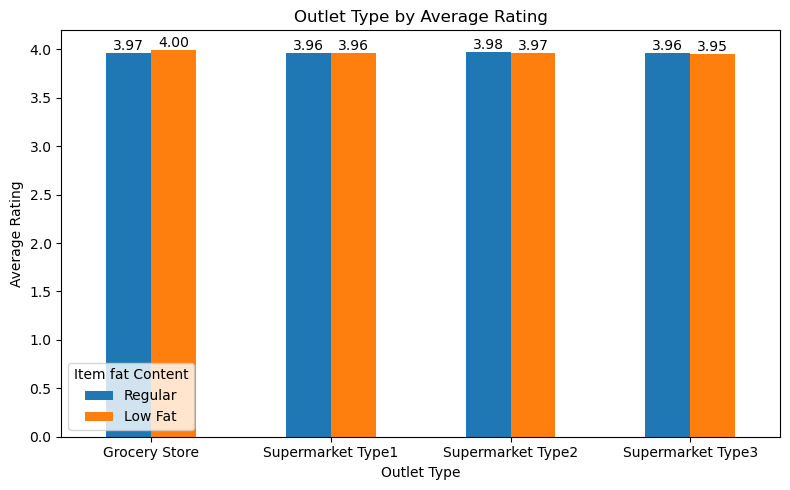

In [43]:
Avg_Rating_grouped = df.groupby(["Outlet Type" , "Item Fat Content"])["Rating"].mean().unstack()
Avg_Rating_grouped = Avg_Rating_grouped[["Regular","Low Fat"]]
ax = Avg_Rating_grouped.plot(kind="bar", figsize = (8,5), title = "Outlet Type by Average Rating")
plt.xlabel("Outlet Type")
plt.ylabel("Average Rating")
plt.legend(title = "Item fat Content")
plt.xticks(rotation = 0)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")
plt.tight_layout()
plt.show()

#### **Fat Content by Outlet Location Type for Total Sales**

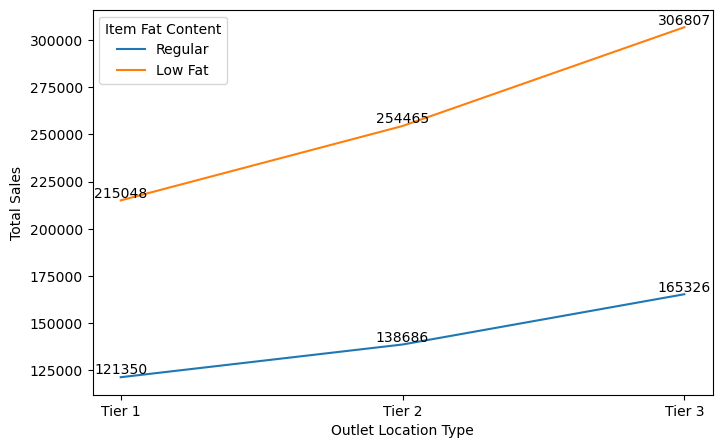

In [52]:
Sales_grouped = df.groupby(["Outlet Location Type", "Item Fat Content"])["Sales"].sum().unstack()
Sales_grouped = Sales_grouped[["Regular","Low Fat"]]
plt.figure(figsize = (8,5))
plt.plot(Sales_grouped.index, Sales_grouped["Regular"],label="Regular")
plt.plot(Sales_grouped.index, Sales_grouped["Low Fat"],label="Low Fat")
for x, y in zip(Sales_grouped.index, Sales_grouped["Regular"]):
    plt.text(x, y, f"{y:.0f}", ha="center", va="bottom")
for x, y in zip(Sales_grouped.index, Sales_grouped["Low Fat"]):
    plt.text(x, y, f"{y:.0f}", ha="center", va="bottom")
plt.xlabel("Outlet Location Type")
plt.ylabel("Total Sales")
plt.legend(title = "Item Fat Content")
plt.xticks(rotation = 0)
plt.grid(False)
plt.show()

#### **Fat Content by Outlet Location Type for Average Rating**

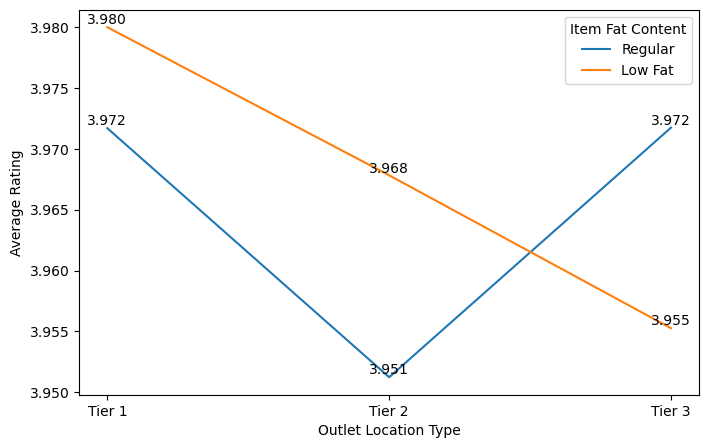

In [54]:
Ratings_grouped = df.groupby(["Outlet Location Type", "Item Fat Content"])["Rating"].mean().unstack()
Ratings_grouped = Ratings_grouped[["Regular","Low Fat"]]
plt.figure(figsize = (8,5))
plt.plot(Ratings_grouped .index, Ratings_grouped ["Regular"],label="Regular")
plt.plot(Ratings_grouped .index, Ratings_grouped ["Low Fat"],label="Low Fat")
for x, y in zip(Ratings_grouped.index, Ratings_grouped["Regular"]):
    plt.text(x, y, f"{y:.3f}", ha="center", va="bottom")
for x, y in zip(Ratings_grouped.index, Ratings_grouped["Low Fat"]):
    plt.text(x, y, f"{y:.3f}", ha="center", va="bottom")
plt.xlabel("Outlet Location Type")
plt.ylabel("Average Rating")
plt.legend(title = "Item Fat Content")
plt.xticks(rotation = 0)
plt.grid(False)
plt.show()

#### **Total Sales by Outlet Establishment Year**

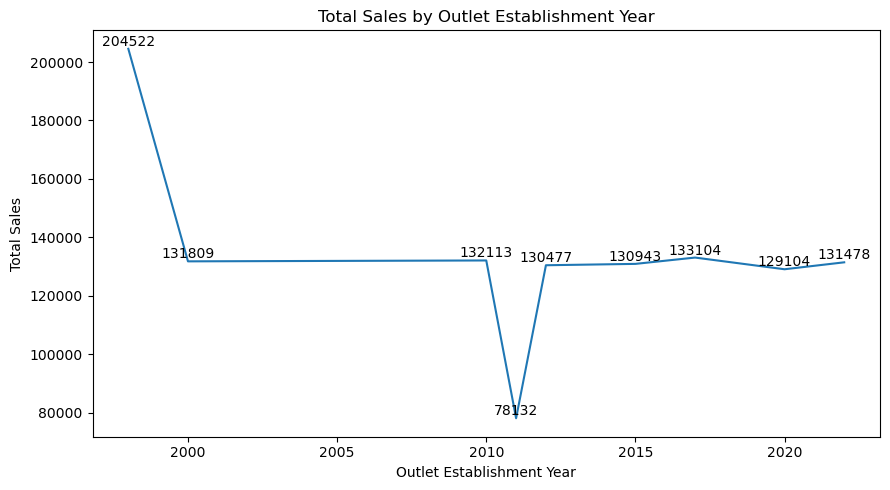

In [61]:
Sales_by_year = df.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(Sales_by_year.index,Sales_by_year.values)
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.title("Total Sales by Outlet Establishment Year")
for x,y in zip (Sales_by_year.index,Sales_by_year.values):
    plt.text(x,y,f'{y:.0f}', ha ="center" , va = "bottom")
plt.tight_layout()
plt.show()

#### **Average Sales by Outlet Establishment Year**

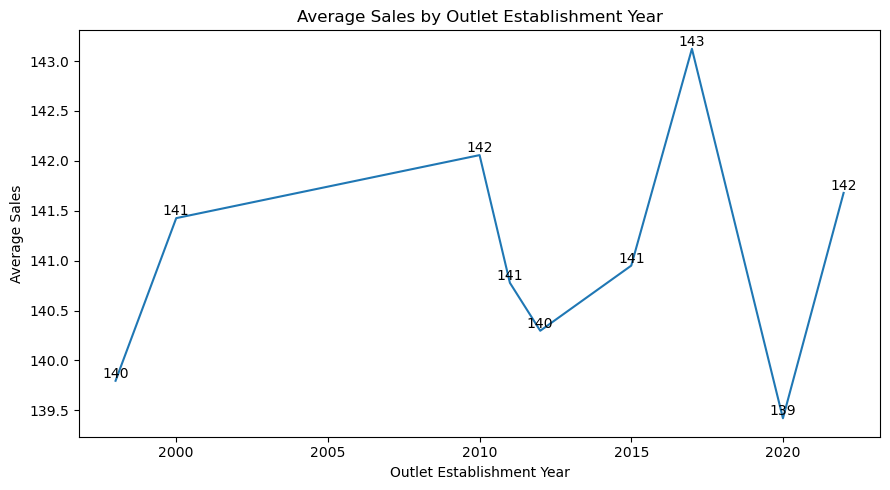

In [62]:
AvgSales_by_year = df.groupby("Outlet Establishment Year")["Sales"].mean().sort_index()
plt.figure(figsize=(9,5))
plt.plot(AvgSales_by_year.index,AvgSales_by_year.values)
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Average Sales")
plt.title("Average Sales by Outlet Establishment Year")
for x,y in zip (AvgSales_by_year.index,AvgSales_by_year.values):
    plt.text(x,y,f'{y:.0f}', ha ="center" , va = "bottom")
plt.tight_layout()
plt.show()

#### **No. of Items by Outlet Establishment Year**

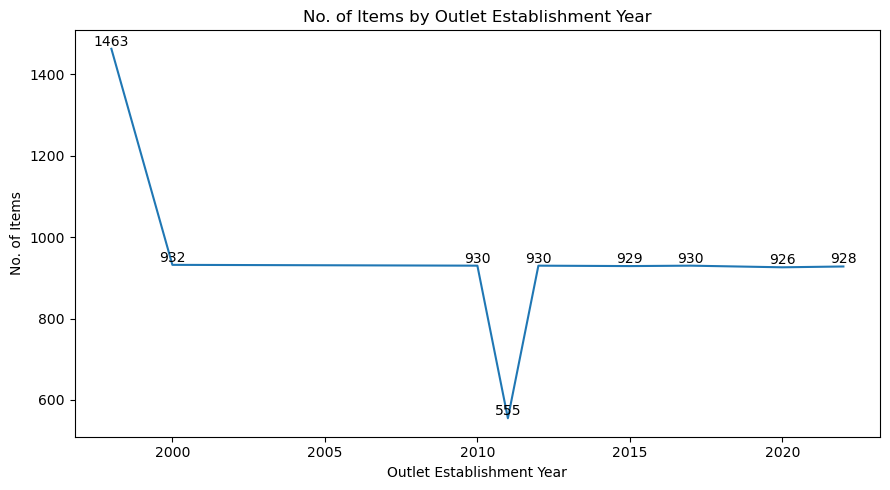

In [63]:
No_of_items_by_year = df.groupby("Outlet Establishment Year")["Sales"].count().sort_index()
plt.figure(figsize=(9,5))
plt.plot(No_of_items_by_year.index,No_of_items_by_year.values)
plt.xlabel("Outlet Establishment Year")
plt.ylabel("No. of Items")
plt.title("No. of Items by Outlet Establishment Year")
for x,y in zip (No_of_items_by_year.index,No_of_items_by_year.values):
    plt.text(x,y,f'{y:.0f}', ha ="center" , va = "bottom")
plt.tight_layout()
plt.show()

#### **Average Rating by Outlet Establishment Year**

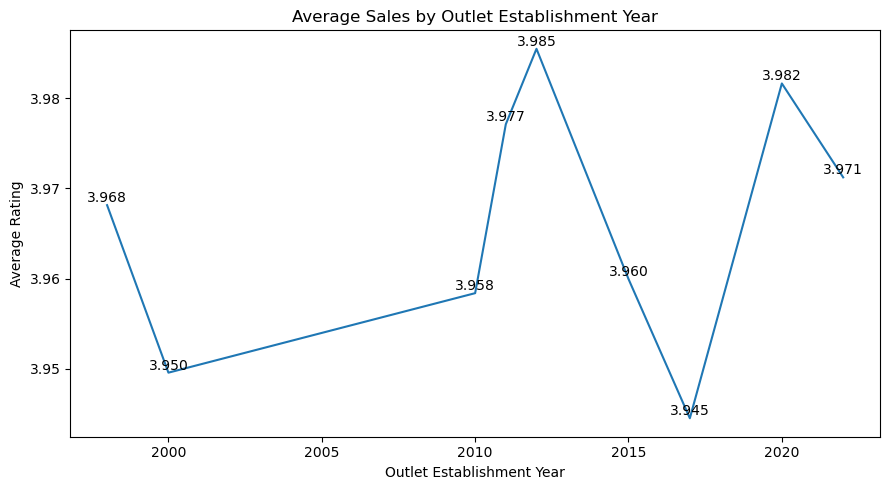

In [65]:
AvgRating_by_year = df.groupby("Outlet Establishment Year")["Rating"].mean().sort_index()
plt.figure(figsize=(9,5))
plt.plot(AvgRating_by_year.index,AvgRating_by_year.values)
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Average Rating")
plt.title("Average Sales by Outlet Establishment Year")
for x,y in zip (AvgRating_by_year.index,AvgRating_by_year.values):
    plt.text(x,y,f'{y:.3f}', ha ="center" , va = "bottom")
plt.tight_layout()
plt.show()

#### **Total Sales by Outlet Type**

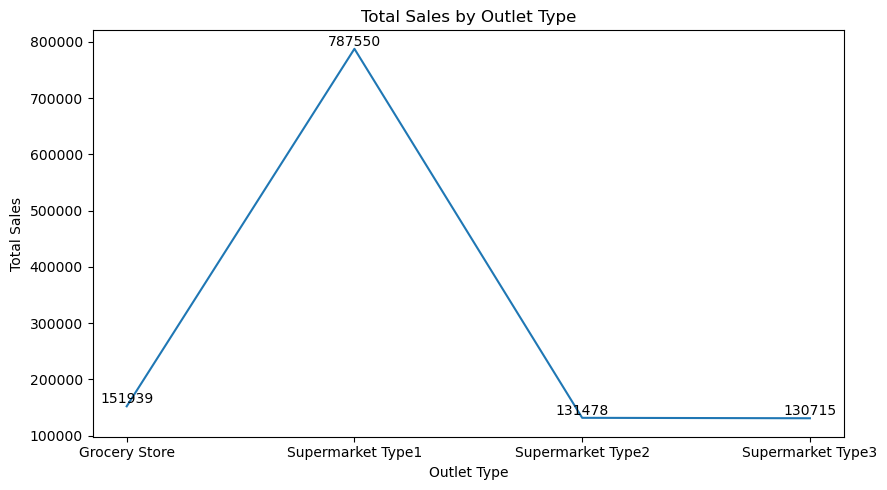

In [68]:
Sales_group = df.groupby("Outlet Type")["Sales"].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(Sales_group.index,Sales_group.values)
plt.xlabel("Outlet Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Outlet Type")
for x,y in zip (Sales_group.index,Sales_group.values):
    plt.text(x,y,f'{y:.0f}', ha ="center" , va = "bottom")
plt.tight_layout()
plt.show()

#### **Average Sales by Outlet Type**

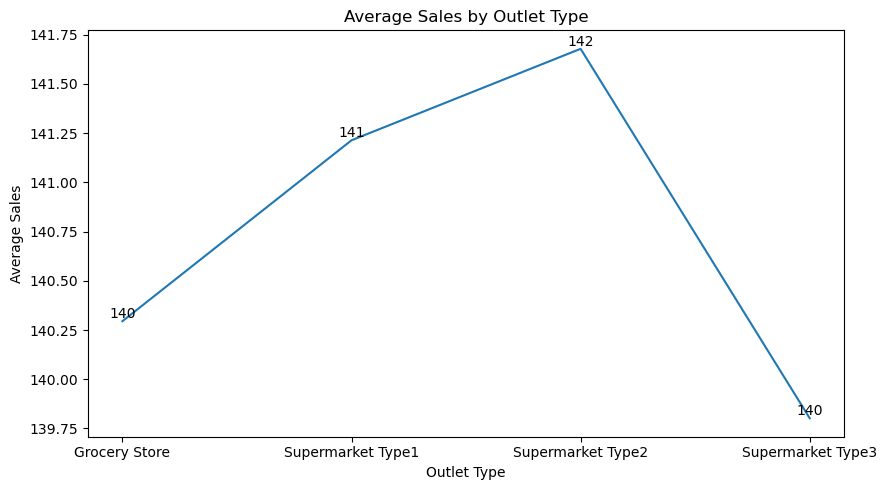

In [70]:
AvgSales_group = df.groupby("Outlet Type")["Sales"].mean().sort_index()
plt.figure(figsize=(9,5))
plt.plot(AvgSales_group.index,AvgSales_group.values)
plt.xlabel("Outlet Type")
plt.ylabel("Average Sales")
plt.title("Average Sales by Outlet Type")
for x,y in zip (AvgSales_group.index,AvgSales_group.values):
    plt.text(x,y,f'{y:.0f}', ha ="center" , va = "bottom")
plt.tight_layout()
plt.show()

#### **Average Rating by Outlet Type**

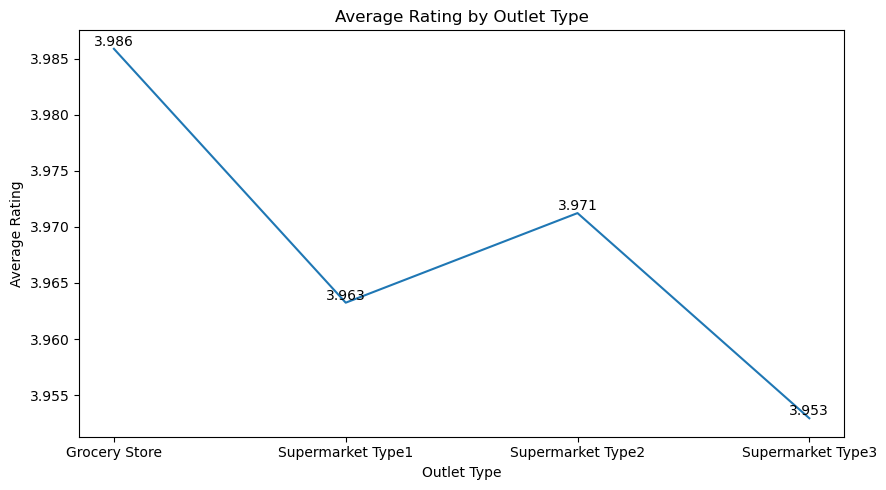

In [72]:
Avg_rating_group = df.groupby("Outlet Type")["Rating"].mean().sort_index()
plt.figure(figsize=(9,5))
plt.plot(Avg_rating_group.index,Avg_rating_group.values)
plt.xlabel("Outlet Type")
plt.ylabel("Average Rating")
plt.title("Average Rating by Outlet Type")
for x,y in zip (Avg_rating_group.index,Avg_rating_group.values):
    plt.text(x,y,f'{y:.3f}', ha ="center" , va = "bottom")
plt.tight_layout()
plt.show()

#### **Total sales by Outlet Size**

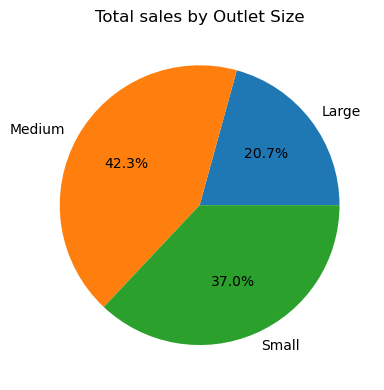

In [73]:
sales_by_size = df.groupby("Outlet Size")["Sales"].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct = '%1.1f%%')
plt.title("Total sales by Outlet Size")
plt.tight_layout()
plt.show()
        

#### **Total sales by Outlet Location**

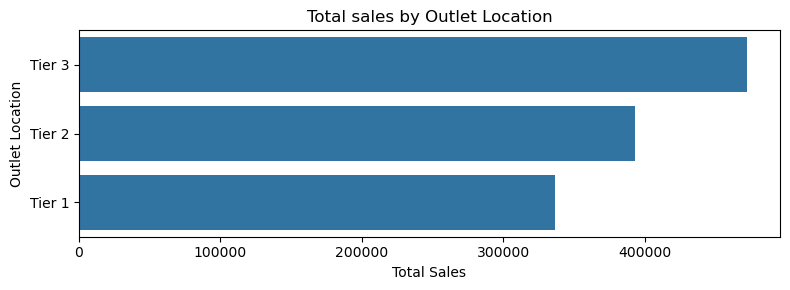

In [74]:
Sales_by_location = df.groupby("Outlet Location Type")["Sales"].sum().reset_index()
Sales_by_location = Sales_by_location.sort_values("Sales",ascending = False )
plt.figure(figsize = (8,3))
ax = sns.barplot(x = "Sales", y = "Outlet Location Type", data = Sales_by_location)
plt.title("Total sales by Outlet Location")
plt.xlabel("Total Sales")
plt.ylabel("Outlet Location")
plt.tight_layout()
plt.show()